## 이론적인 Lookback Option 예제

룩백 옵션(Lookback Option)은 기초 자산의 과거 가격 중 최적의 가격(최고 또는 최저 가격)을 기준으로 옵션의 페이오프가 결정되는 옵션입니다. 룩백 옵션은 "Fixed Strike Lookback Option"과 "Floating Strike Lookback Option"으로 나눌 수 있습니다.


Fixed Strike Call Option Price: 16.45
Fixed Strike Put Option Price: 13.57
Floating Strike Call Option Price: 16.45
Floating Strike Put Option Price: 13.57


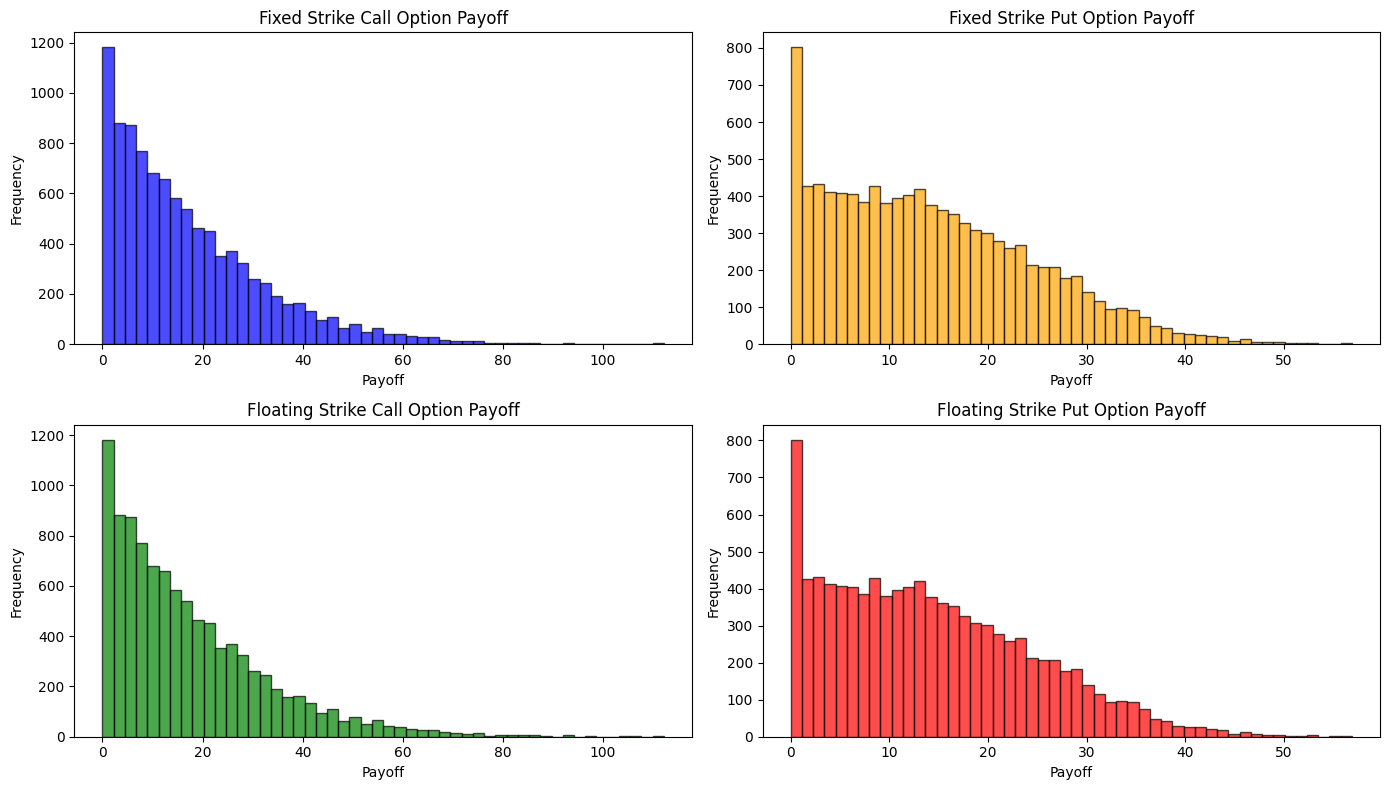

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_stock_paths(S0, r, sigma, T, M, I):
    """
    주식 가격 경로 시뮬레이션 함수

    Parameters:
    S0: 초기 주식 가격
    r: 무위험 이자율
    sigma: 변동성
    T: 만기 시간 (단위: 년)
    M: 기간 수 (단위: 일)
    I: 시뮬레이션 수

    Returns:
    주식 가격 경로 배열 (I x M)
    """
    dt = T / M
    paths = np.zeros((I, M + 1))
    paths[:, 0] = S0
    for t in range(1, M + 1):
        z = np.random.standard_normal(I)
        paths[:, t] = paths[:, t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * z)
    return paths

def lookback_option_payoff(paths, K, option_type="call", strike_type="fixed"):
    """
    룩백 옵션의 페이오프 계산 함수

    Parameters:
    paths: 주식 가격 경로 배열 (I x M)
    K: 행사가격
    option_type: "call" 또는 "put"
    strike_type: "fixed" 또는 "floating"

    Returns:
    룩백 옵션의 페이오프 배열
    """
    if option_type == "call":
        if strike_type == "fixed":
            min_price = np.min(paths, axis=1)
            payoff = np.maximum(paths[:, -1] - min_price, 0)
        elif strike_type == "floating":
            min_price = np.min(paths, axis=1)
            payoff = np.maximum(paths[:, -1] - min_price, 0)
    elif option_type == "put":
        if strike_type == "fixed":
            max_price = np.max(paths, axis=1)
            payoff = np.maximum(max_price - paths[:, -1], 0)
        elif strike_type == "floating":
            max_price = np.max(paths, axis=1)
            payoff = np.maximum(max_price - paths[:, -1], 0)
    else:
        raise ValueError("option_type must be 'call' or 'put'")

    return payoff

# 예제 파라미터
S0 = 100  # 초기 주식 가격
K = 100  # 행사가격
r = 0.05  # 무위험 이자율
sigma = 0.2  # 변동성
T = 1  # 만기 시간 (1년)
M = 252  # 기간 수 (일 수)
I = 10000  # 시뮬레이션 수

# 주식 가격 경로 시뮬레이션
paths = simulate_stock_paths(S0, r, sigma, T, M, I)

# 룩백 옵션 페이오프 계산
fixed_strike_call_payoff = lookback_option_payoff(paths, K, option_type="call", strike_type="fixed")
fixed_strike_put_payoff = lookback_option_payoff(paths, K, option_type="put", strike_type="fixed")
floating_strike_call_payoff = lookback_option_payoff(paths, K, option_type="call", strike_type="floating")
floating_strike_put_payoff = lookback_option_payoff(paths, K, option_type="put", strike_type="floating")

# 룩백 옵션 가격 계산 (할인된 페이오프 평균)
fixed_strike_call_price = np.exp(-r * T) * np.mean(fixed_strike_call_payoff)
fixed_strike_put_price = np.exp(-r * T) * np.mean(fixed_strike_put_payoff)
floating_strike_call_price = np.exp(-r * T) * np.mean(floating_strike_call_payoff)
floating_strike_put_price = np.exp(-r * T) * np.mean(floating_strike_put_payoff)
print(f"Fixed Strike Call Option Price: {fixed_strike_call_price:.2f}")
print(f"Fixed Strike Put Option Price: {fixed_strike_put_price:.2f}")
print(f"Floating Strike Call Option Price: {floating_strike_call_price:.2f}")
print(f"Floating Strike Put Option Price: {floating_strike_put_price:.2f}")

# 시각화
plt.figure(figsize=(14, 8))

plt.subplot(2, 2, 1)
plt.hist(fixed_strike_call_payoff, bins=50, color='blue', edgecolor='black', alpha=0.7)
plt.title('Fixed Strike Call Option Payoff')
plt.xlabel('Payoff')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
plt.hist(fixed_strike_put_payoff, bins=50, color='orange', edgecolor='black', alpha=0.7)
plt.title('Fixed Strike Put Option Payoff')
plt.xlabel('Payoff')
plt.ylabel('Frequency')

plt.subplot(2, 2, 3)
plt.hist(floating_strike_call_payoff, bins=50, color='green', edgecolor='black', alpha=0.7)
plt.title('Floating Strike Call Option Payoff')
plt.xlabel('Payoff')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
plt.hist(floating_strike_put_payoff, bins=50, color='red', edgecolor='black', alpha=0.7)
plt.title('Floating Strike Put Option Payoff')
plt.xlabel('Payoff')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


## 실제 데이터를 활용

[*********************100%%**********************]  1 of 1 completed


Fixed Strike Call Option Price: 64.77
Fixed Strike Put Option Price: 5.98
Floating Strike Call Option Price: 64.77
Floating Strike Put Option Price: 5.98


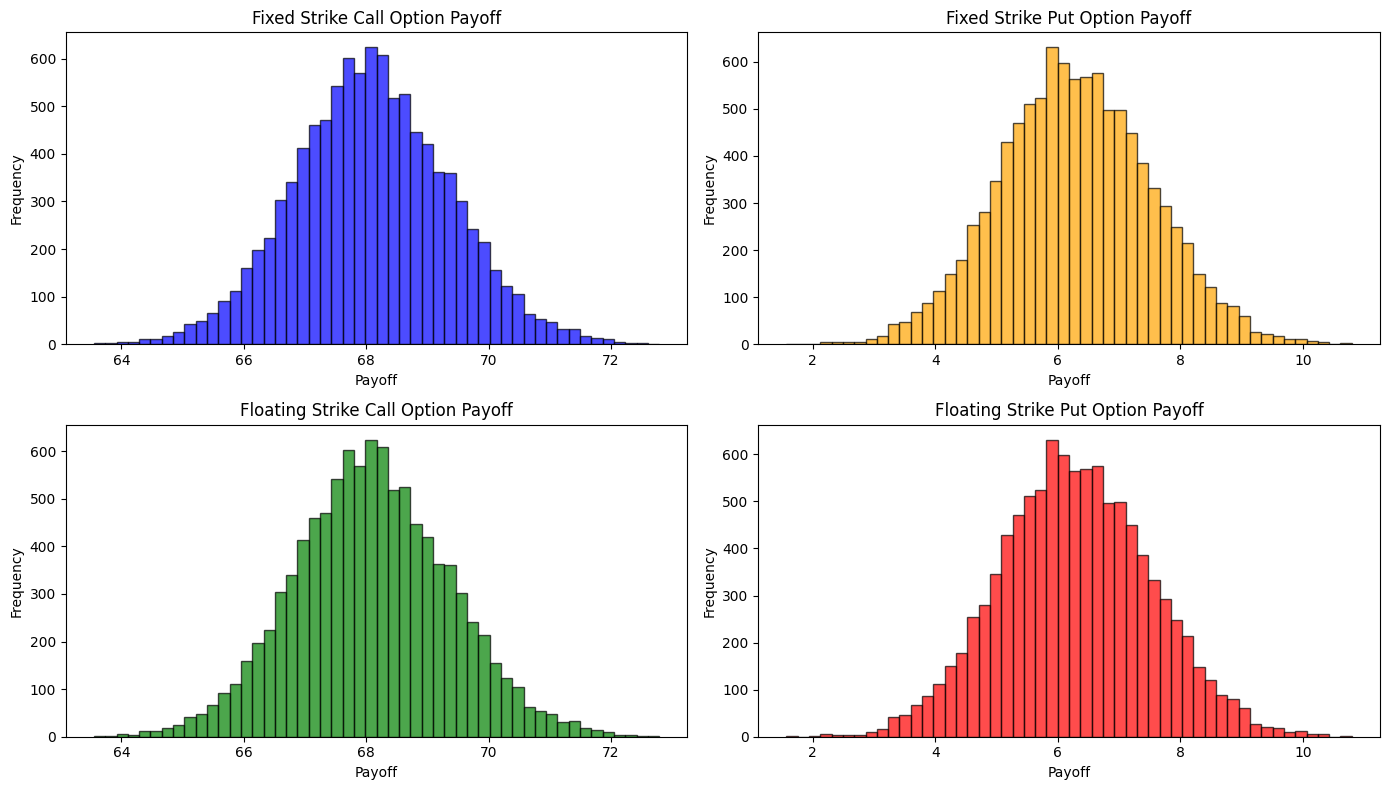

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

def lookback_option_payoff(prices, option_type="call", strike_type="fixed"):
    """
    룩백 옵션의 페이오프 계산 함수

    Parameters:
    prices: 주식 가격 배열
    option_type: "call" 또는 "put"
    strike_type: "fixed" 또는 "floating"

    Returns:
    룩백 옵션의 페이오프
    """
    if option_type == "call":
        if strike_type == "fixed":
            min_price = np.min(prices)
            payoff = np.maximum(prices[-1] - min_price, 0)
        elif strike_type == "floating":
            min_price = np.min(prices)
            payoff = np.maximum(prices[-1] - min_price, 0)
    elif option_type == "put":
        if strike_type == "fixed":
            max_price = np.max(prices)
            payoff = np.maximum(max_price - prices[-1], 0)
        elif strike_type == "floating":
            max_price = np.max(prices)
            payoff = np.maximum(max_price - prices[-1], 0)
    else:
        raise ValueError("option_type must be 'call' or 'put'")
    return payoff

# yfinance를 사용하여 데이터 다운로드
ticker = 'AAPL'
data = yf.download(ticker, start="2023-01-01", end="2023-12-31")
closing_prices = data['Close'].values

# 룩백 옵션 파라미터 설정
r = 0.05  # 무위험 이자율
T = 1  # 만기 시간 (1년)
M = len(closing_prices)  # 실제 데이터의 기간 수
I = 10000  # 시뮬레이션 수

# 주식 가격 경로 시뮬레이션 (실제 데이터 사용)
S = np.zeros((I, M))
for i in range(I):
    S[i] = closing_prices + np.random.normal(0, 1, M)

# 룩백 옵션 페이오프 계산
fixed_strike_call_payoff = np.array([lookback_option_payoff(S[i], option_type="call", strike_type="fixed") for i in range(I)])
fixed_strike_put_payoff = np.array([lookback_option_payoff(S[i], option_type="put", strike_type="fixed") for i in range(I)])
floating_strike_call_payoff = np.array([lookback_option_payoff(S[i], option_type="call", strike_type="floating") for i in range(I)])
floating_strike_put_payoff = np.array([lookback_option_payoff(S[i], option_type="put", strike_type="floating") for i in range(I)])

# 룩백 옵션 가격 계산 (할인된 페이오프 평균)
fixed_strike_call_price = np.exp(-r * T) * np.mean(fixed_strike_call_payoff)
fixed_strike_put_price = np.exp(-r * T) * np.mean(fixed_strike_put_payoff)
floating_strike_call_price = np.exp(-r * T) * np.mean(floating_strike_call_payoff)
floating_strike_put_price = np.exp(-r * T) * np.mean(floating_strike_put_payoff)
print(f"Fixed Strike Call Option Price: {fixed_strike_call_price:.2f}")
print(f"Fixed Strike Put Option Price: {fixed_strike_put_price:.2f}")
print(f"Floating Strike Call Option Price: {floating_strike_call_price:.2f}")
print(f"Floating Strike Put Option Price: {floating_strike_put_price:.2f}")

# 시각화
plt.figure(figsize=(14, 8))

plt.subplot(2, 2, 1)
plt.hist(fixed_strike_call_payoff, bins=50, color='blue', edgecolor='black', alpha=0.7)
plt.title('Fixed Strike Call Option Payoff')
plt.xlabel('Payoff')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
plt.hist(fixed_strike_put_payoff, bins=50, color='orange', edgecolor='black', alpha=0.7)
plt.title('Fixed Strike Put Option Payoff')
plt.xlabel('Payoff')
plt.ylabel('Frequency')

plt.subplot(2, 2, 3)
plt.hist(floating_strike_call_payoff, bins=50, color='green', edgecolor='black', alpha=0.7)
plt.title('Floating Strike Call Option Payoff')
plt.xlabel('Payoff')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
plt.hist(floating_strike_put_payoff, bins=50, color='red', edgecolor='black', alpha=0.7)
plt.title('Floating Strike Put Option Payoff')
plt.xlabel('Payoff')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()
